ESTIMACIÓN DE LA CURVA CARACTERÍSTICA DE POTENCIAL PARA UN DETECTOR DE RADIACIÓN CHERENCOV EN AGUA (WCD)

In [1]:
import bz2 
from scipy.stats import norm
import matplotlib.pyplot as pl 
import numpy as np

In [2]:
matrix_data = []
vec_data = []
cont = 0
cont2 = 0
with bz2.open( "chitaga.dat.bz2", "rt" ) as bz_file:
    for line in bz_file: #se lee linea a linea del archivo 
        
        rline = line.rstrip('\n').split(' ') #se desconcatena
        cont += 1
        if cont > 49: #justo ene sa linea los datos siguen una estructura secuencial
            if rline[0] == "#":
                if len(rline) == 3: ##fin de linea de pulso
                    n = 0
                if len(rline) == 4:
                    if n == 12:
                        #print('Funciona') 
                        matrix_data.append(vec_data) #se va guardando en la matriz de datos
                        vec_data = [] #se reinicializa el vector 
                        #break
                    else:
                        vec_data = [] # en caso de estar incompleto el vector, no se guarda
                        # pero si se inicializa
                        
            else:                
                n += 1
                cont2 += 1
                vec_data.append(int(rline[0]))
                #if cont2 == 50:
                 #   #print(vec_data)
                  #  break
ml = np.asarray(matrix_data)-50 #resto el valor del offset de la electrónica del detector
ml = ml 
print(ml.shape)





(749600, 12)


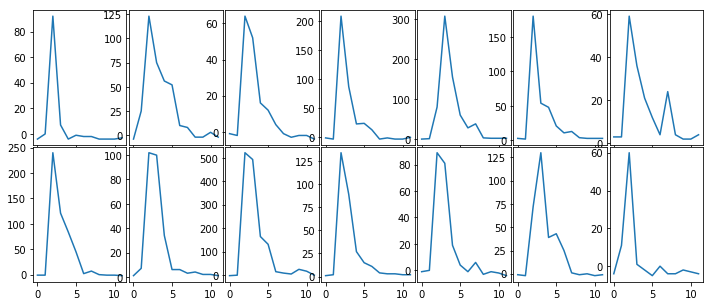

Pulsos de verificacion de data- Aleatorios


In [3]:
#print(ml)
dt = 25e-9
t = np.linspace(0,12*25,12)*1e-9
np.random.seed()
rand_14 = np.random.randint(0, ml.shape[0],14) #selecciono 14 datos aleaorios
#print(rand_14)
pulsos_ejemplo = ml[rand_14][:]
num_rows, num_cols = 2, 7
f, ax = pl.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
squeeze=True)
#print(pulsos_ejemplo)
for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("on")
        ax[r,c].plot(pulsos_ejemplo[image_index][:])
        #ax[r,c].set_title('Pulso No. %d' % s[image_index])


pl.show()
print('Pulsos de verificacion de data- Aleatorios')

In [4]:
# calculo de los valores de carga para cada pulso
Q = np.zeros([749600,1],dtype = float)
for h in range(749600):
    Q[h] = sum(ml[h][:])
Q = Q*dt

In [5]:
#se verifica que la integral corresponda al valor del vector, y sin los valores del offset
print('--vector = ',ml[0],' --Integral= ',Q[0])

--vector =  [ 1  0 84  9  2  2  0  2  1  2  0  1]  --Integral=  [2.6e-06]


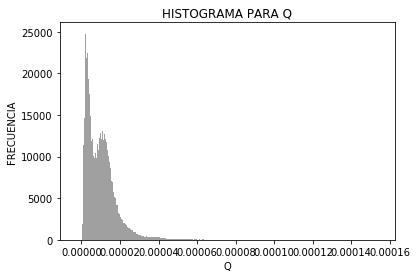

In [6]:
frec, bins ,patches = pl.hist(Q, bins = 500, facecolor='gray', alpha=0.75)
bincenters = 0.5*(bins[1:]+bins[:-1])
pl.title('HISTOGRAMA PARA Q')
pl.ylabel('FRECUENCIA')
pl.xlabel('Q')
#pl.xlim(100,600) #se ajusta el eje x para visualizar la parte del histograma que interesa analizar
pl.show()

para analizar la data, extraigo un vector de los bins del histograma para realizar el fit de la gausiana

15
[11478. 10781. 11958. 12224. 11751. 12826. 12109. 12838. 13026. 11996.
 12844. 12745. 11219. 12139. 11733. 10488.]


/home/roberto/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


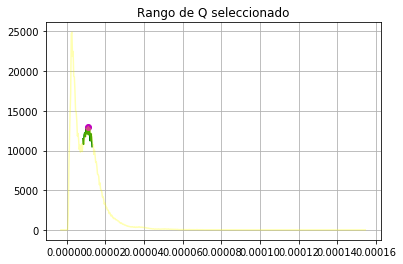

Media=  12009.6875 , Desviación Estandar=  732.0371164386065


In [7]:


from scipy.stats import norm
import matplotlib.mlab as mlab


km = np.reshape(frec, 500)
vec_fit = km[30:60] ## solo se usa para garantizar encontrar el valor maximo del segundo pico
indice = np.argmax(vec_fit)
print(indice)##indice del valor maximo del arreglo en el rango seleccionado
indice_max_gen = indice+30 ## indice para usar en el arreglo general bins
num = 8
rango = km[indice_max_gen-num:indice_max_gen+num]
print(rango)
pl.plot(bins[indice_max_gen-num:indice_max_gen+num],rango,color = 'green')
pl.plot(bins[indice_max_gen],frec[indice_max_gen],'mo')
pl.plot(bins[1:],frec,color = 'yellow', alpha=0.3)
#pl.plot(bins[30:60],km[30:60])
pl.grid('on')
pl.title('Rango de Q seleccionado')
pl.show()
(mu, sigma) = norm.fit(rango) ## se determina la media y la desviacion estandar
print('Media= ',mu, ', Desviación Estandar= ',sigma)

#y = mlab.normpdf( bins[270:570], mu, sigma)


Con el valor de la media y la desviación estandar se procede a determinar el rango en el eje de Q para determinar el intervalo que corresponde a la energía media de un muon.

In [8]:
ind_q = []
minimo = float('Inf')
maximo = 0
for ind, val in enumerate(rango):
    print(ind, val)
    if val > mu-sigma and val<mu+sigma:
        if val > maximo:
            indice_mayor = ind
            maximo = val
        if val < minimo:
            indice_menor = ind
            minimo = val
print('Menor= ', rango[indice_menor])
print('Mayor= ', rango[indice_mayor])
# en funcion de las Q que son las que interesan 
menor_q_posible =  bins[indice_max_gen-indice_menor]
mayor_q_posible = bins[indice_max_gen+indice_mayor]
print('Menor q posible = ', menor_q_posible)
print('Mayor q posible = ', mayor_q_posible)


0 11478.0
1 10781.0
2 11958.0
3 12224.0
4 11751.0
5 12826.0
6 12109.0
7 12838.0
8 13026.0
9 11996.0
10 12844.0
11 12745.0
12 11219.0
13 12139.0
14 11733.0
15 10488.0
Menor=  11478.0
Mayor=  12224.0
Menor q posible =  1.0815499999999998e-05
Mayor q posible =  1.1763199999999998e-05


Con el rango de q establecido de q, se analiza la matriz de q, para hacer el conteo de muones y generar un pulso medio a partir de la cantidad de eventos iniciales

In [9]:
pulso_medio = np.zeros(12,dtype = float)
N_mu = 0 ##contador de muones 
for yy in range(len(Q)):
    if Q[yy] > menor_q_posible and Q[yy] < mayor_q_posible:
        pulso_medio +=ml[yy] 
        N_mu += 1
pulso_medio = pulso_medio/N_mu


Número de Muones Contados=  37866


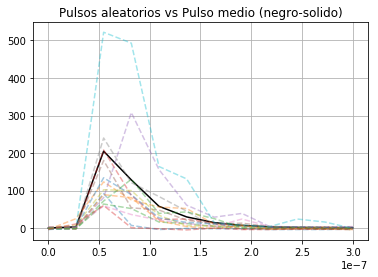

In [12]:
# se compara el pulso medio, con los pulsos aleatorios de la entrada y se comprueba si hay algún muon en esa muestra
pl.plot(t,pulso_medio,color = 'k')
for rr in range(14):
    pl.plot(t,pulsos_ejemplo[rr], '--', alpha = 0.4) 
    

pl.title('Pulsos aleatorios vs Pulso medio (negro-solido)')
pl.grid('on')
print('Número de Muones Contados= ', N_mu)
pl.show()